# Test runs of zogy implementation DM-25115
In this notebook we run ZogyTask with a sourceless, and one with one variable source generated images.

In [3]:
%matplotlib notebook
import numpy as np
import matplotlib.pyplot as plt
import matplotlib

# Re-running this run statement does not always update the definition of the class/functions in the notebook
# Development version copy here of unit test in lsst/ip_diffim/tests/test_zogy.py
%run -n -i "zogy_test_dev.py"

In [4]:
T = ZogyTest()
T.setUp()
T._setUpImagesFlexible()

## Empty image
We check the variance levels and planes; var1=100; var2=100

### Input exposures

<IPython.core.display.Javascript object>


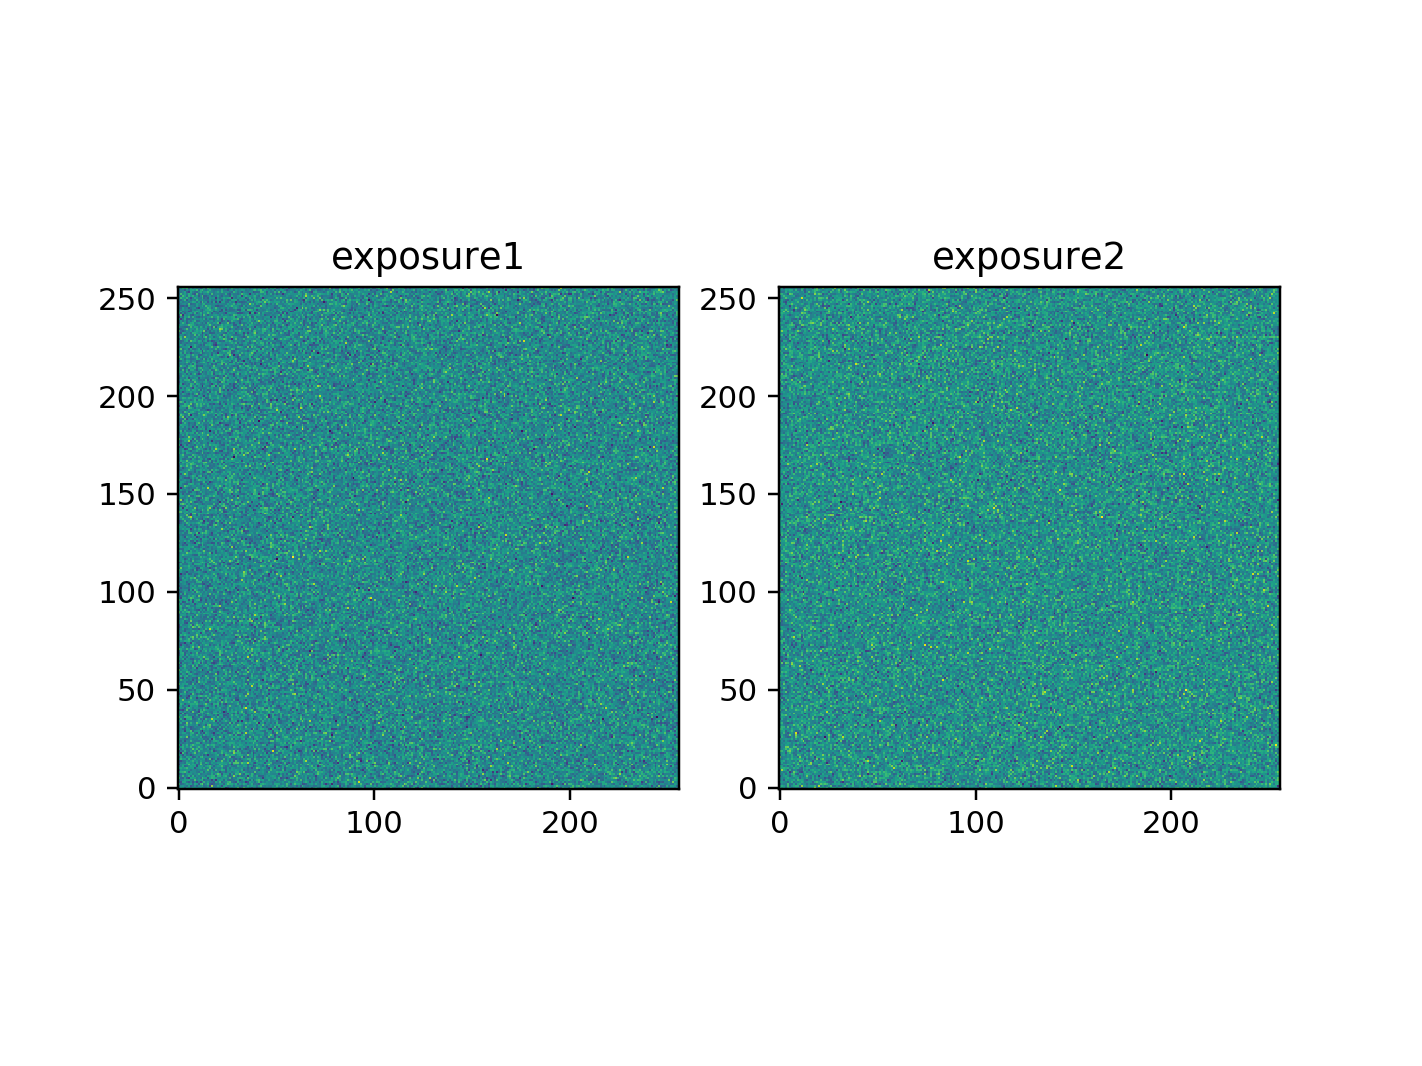

Text(0.5, 1.0, 'exposure2')

In [5]:
# Input exposures
R = T.im1ex
fig = plt.figure()
ax = fig.add_subplot(1, 2, 1)
ax.imshow(R.image.array, interpolation='none', origin='bottom')
ax.set_title("exposure1")

R = T.im2ex
ax = fig.add_subplot(1, 2, 2)
ax.imshow(R.image.array, interpolation='none', origin='bottom')
ax.set_title("exposure2")

<IPython.core.display.Javascript object>


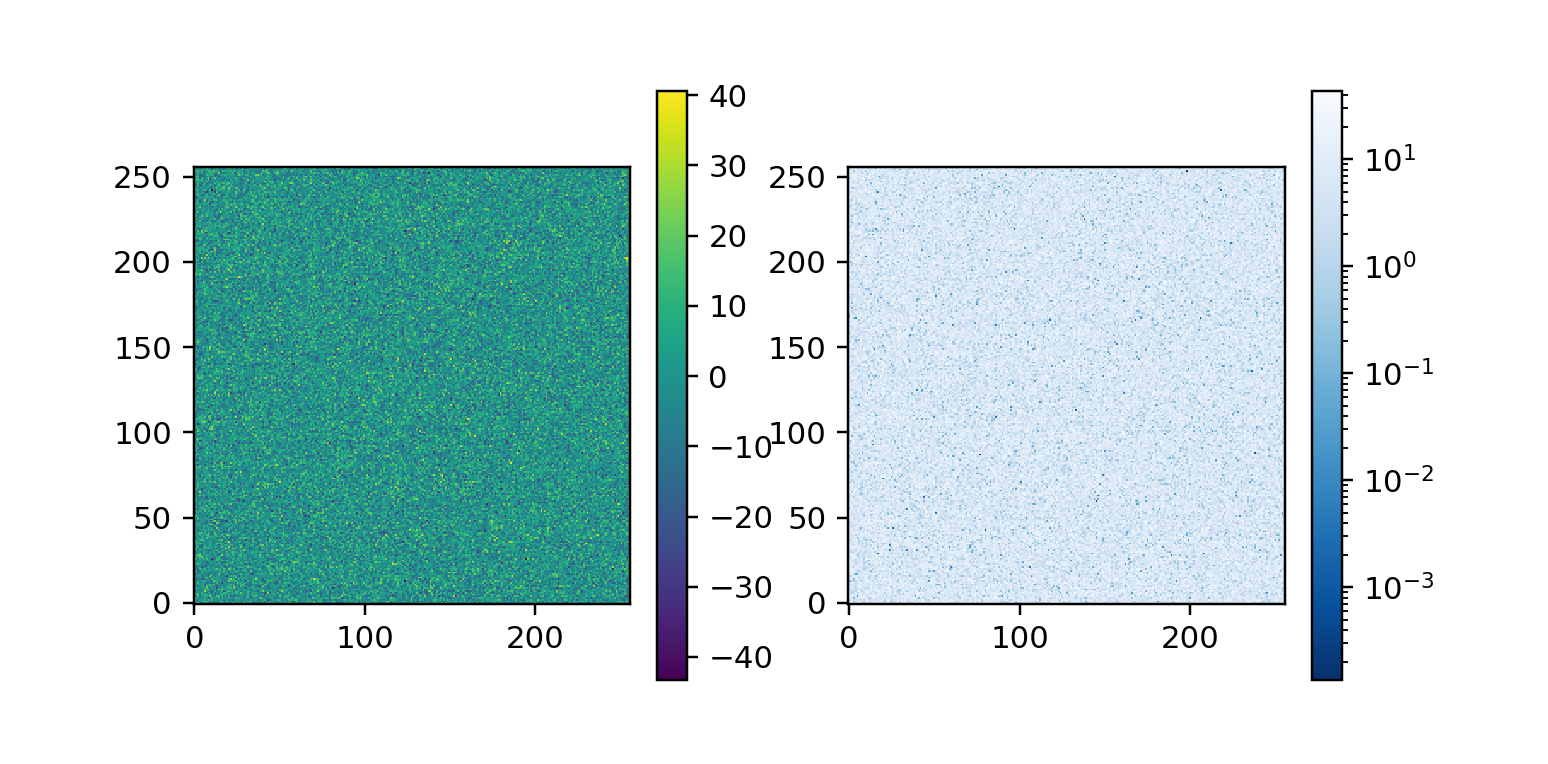

In [16]:
fig = plt.figure()
ax = fig.add_subplot(1, 2, 1)
cs = ax.imshow(R.image.array, interpolation='none', origin='bottom')
fig.colorbar(cs)
ax = fig.add_subplot(1, 2, 2)
cs = ax.imshow(np.abs(R.image.array)+1e-10,origin='bottom',cmap='Blues_r',norm=matplotlib.colors.LogNorm())
fig.colorbar(cs)

<IPython.core.display.Javascript object>


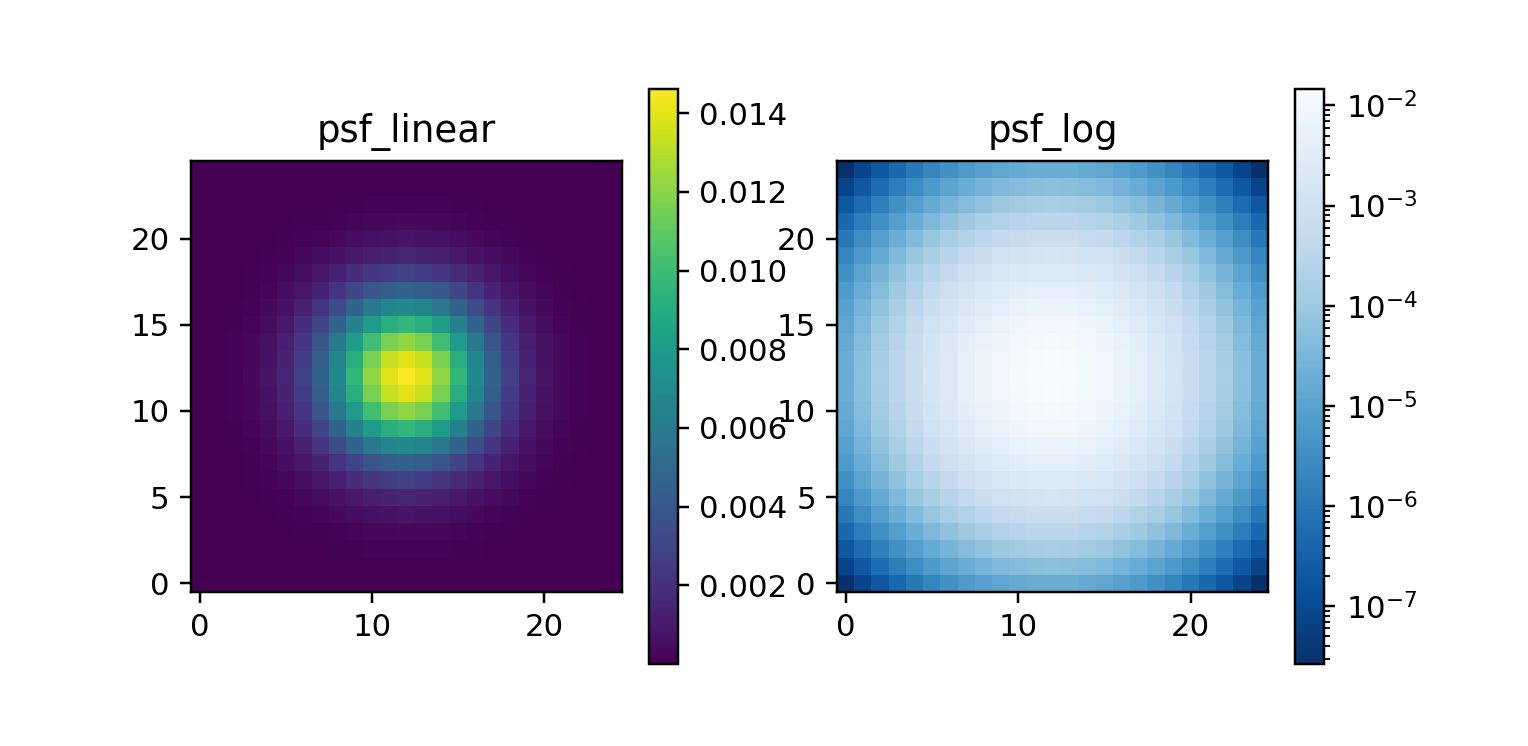

(25, 25)

In [6]:
A = T.im1ex.getPsf().computeImage().array
# Normal and log-plot of kernel solution
fig = plt.figure()
ax = fig.add_subplot(1,2,1)
cs = ax.imshow(A,origin='bottom')
ax.set_title("psf_linear")
fig.colorbar(cs)
ax = fig.add_subplot(1,2,2)
cs = ax.imshow(np.abs(A)+1e-10,origin='bottom',cmap='Blues_r',norm=matplotlib.colors.LogNorm())
fig.colorbar(cs)
ax.set_title("psf_log")
A.shape

In [7]:
res = T.testZogyDiffim()
S = res.scoreExp
F = res.ftDiff
R = res.diffExp

In [8]:
1./F.Fd

14.142135623730951

<IPython.core.display.Javascript object>


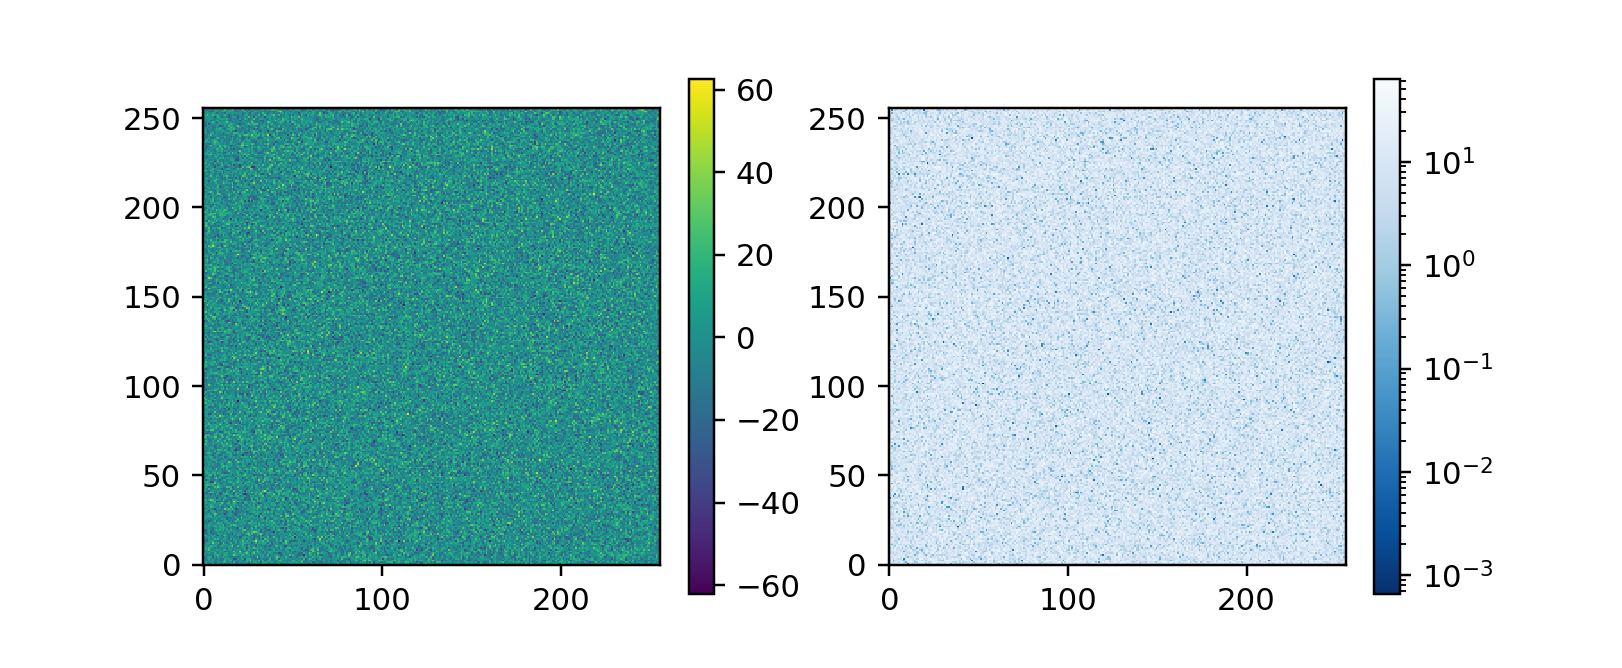

In [9]:
fig = plt.figure()
ax = fig.add_subplot(1, 2, 1)
cs = ax.imshow(R.image.array, interpolation='none', origin='bottom')
fig.colorbar(cs)
ax = fig.add_subplot(1, 2, 2)
cs = ax.imshow(np.abs(R.image.array)+1e-10,origin='bottom',cmap='Blues_r',norm=matplotlib.colors.LogNorm())
fig.colorbar(cs)

Variance plane of difference exposure

The strong drop at the edge is due to the zero padding.
The shallow edge is believed to come from the combination of the edge regions of the two inputs.

<IPython.core.display.Javascript object>


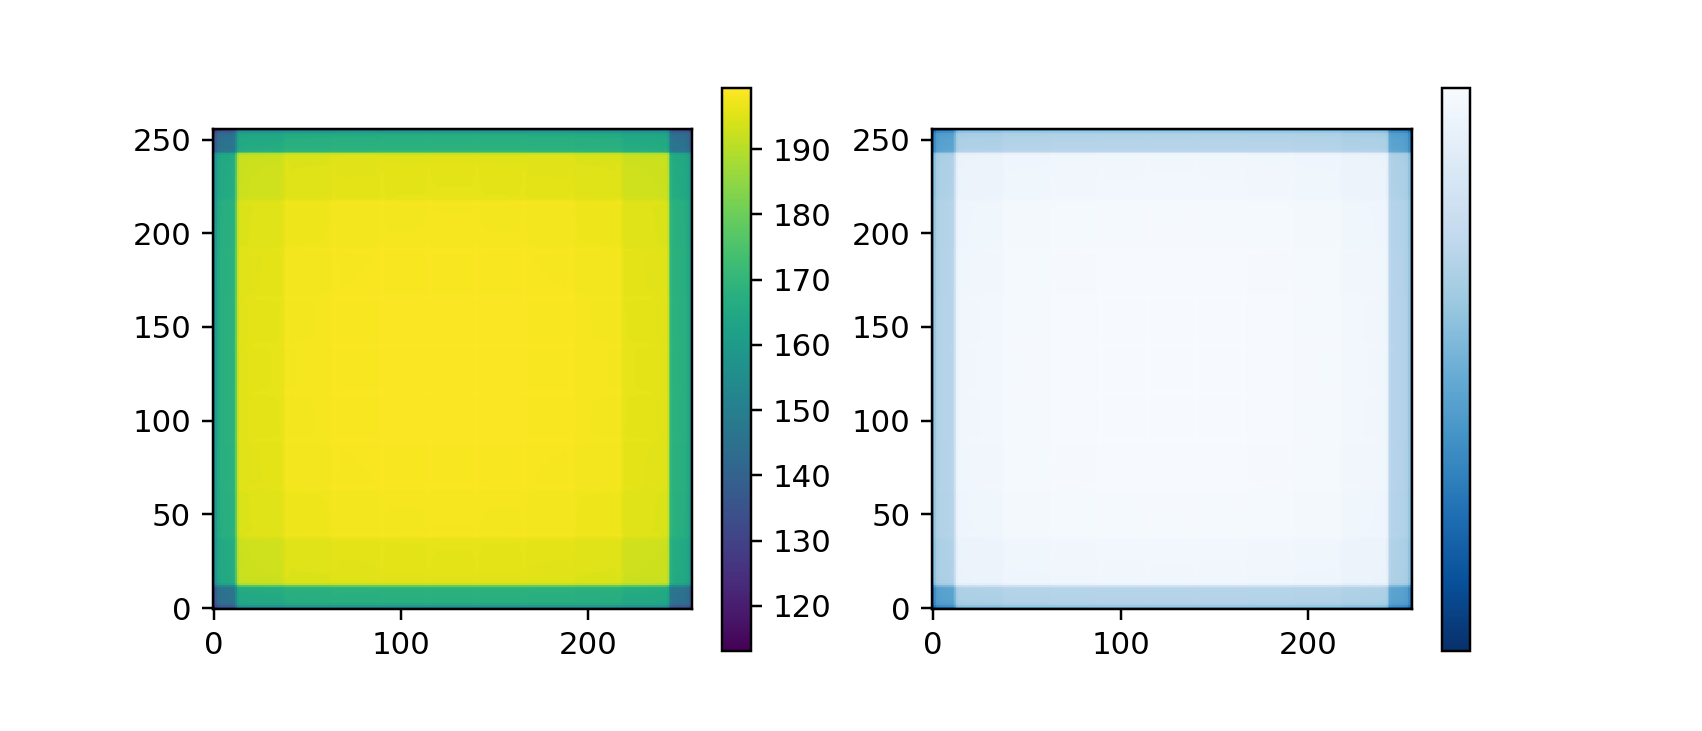

In [10]:
fig = plt.figure()
ax = fig.add_subplot(1, 2, 1)
cs = ax.imshow(R.variance.array, interpolation='none', origin='bottom')
fig.colorbar(cs)
ax = fig.add_subplot(1, 2, 2)
cs = ax.imshow(np.abs(R.variance.array)+1e-10,origin='bottom',cmap='Blues_r',norm=matplotlib.colors.LogNorm())
fig.colorbar(cs)

The score image, without any scaling.

<IPython.core.display.Javascript object>


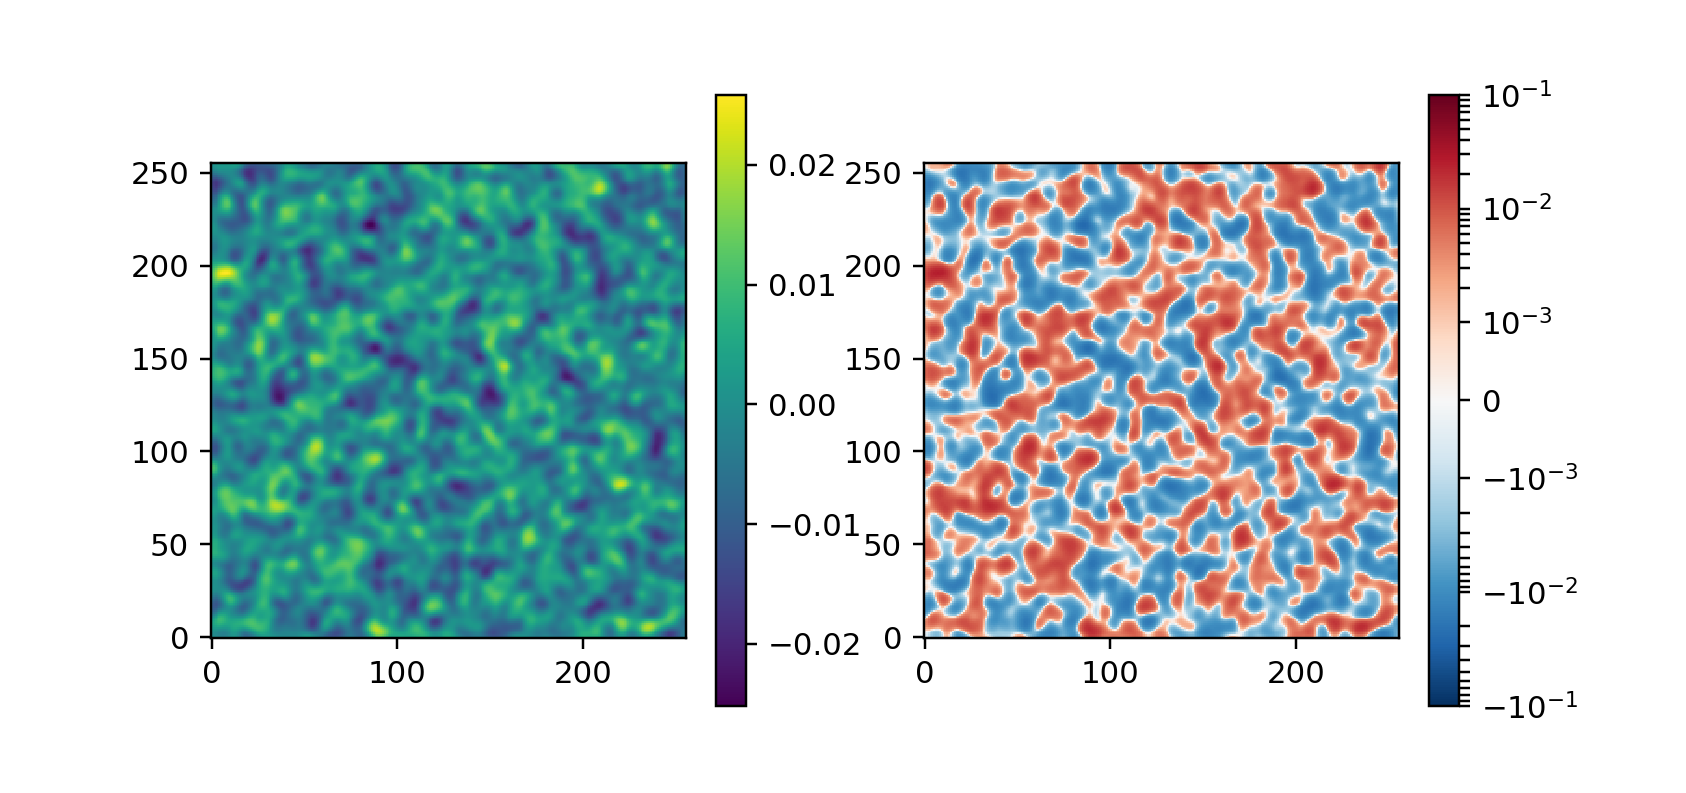

In [11]:
fig = plt.figure()
ax = fig.add_subplot(1, 2, 1)
cs = ax.imshow(S.image.array, interpolation='none', origin='bottom')
fig.colorbar(cs)
ax = fig.add_subplot(1, 2, 2)
cs = ax.imshow(S.image.array,origin='bottom',cmap='RdBu_r',
               norm=matplotlib.colors.SymLogNorm(linthresh=1e-3,vmin=-0.1,vmax=0.1))
fig.colorbar(cs)

The score image has a very narrow variance plane drop, because the diffexp extends into the paddign area by Pd convolution.

<IPython.core.display.Javascript object>


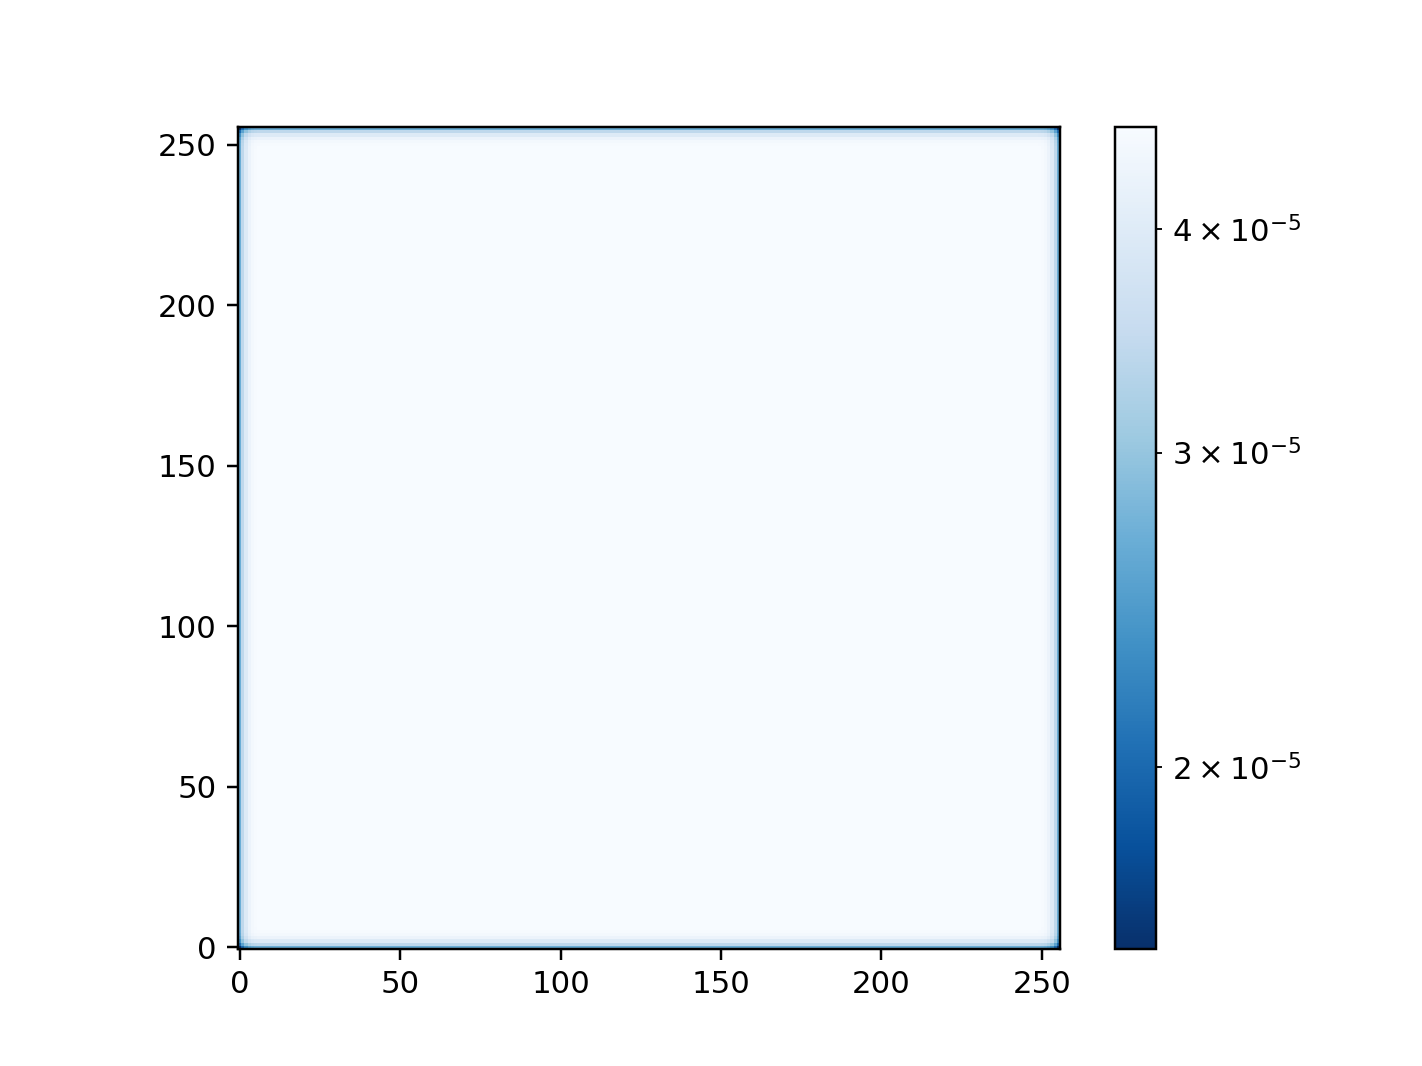

In [12]:
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
cs = ax.imshow(S.variance.array, interpolation='none', origin='bottom',cmap='Blues_r', 
               norm=matplotlib.colors.LogNorm())
fig.colorbar(cs)

Dividing S by its sigma, we got the detection significance in sigmas.

<IPython.core.display.Javascript object>


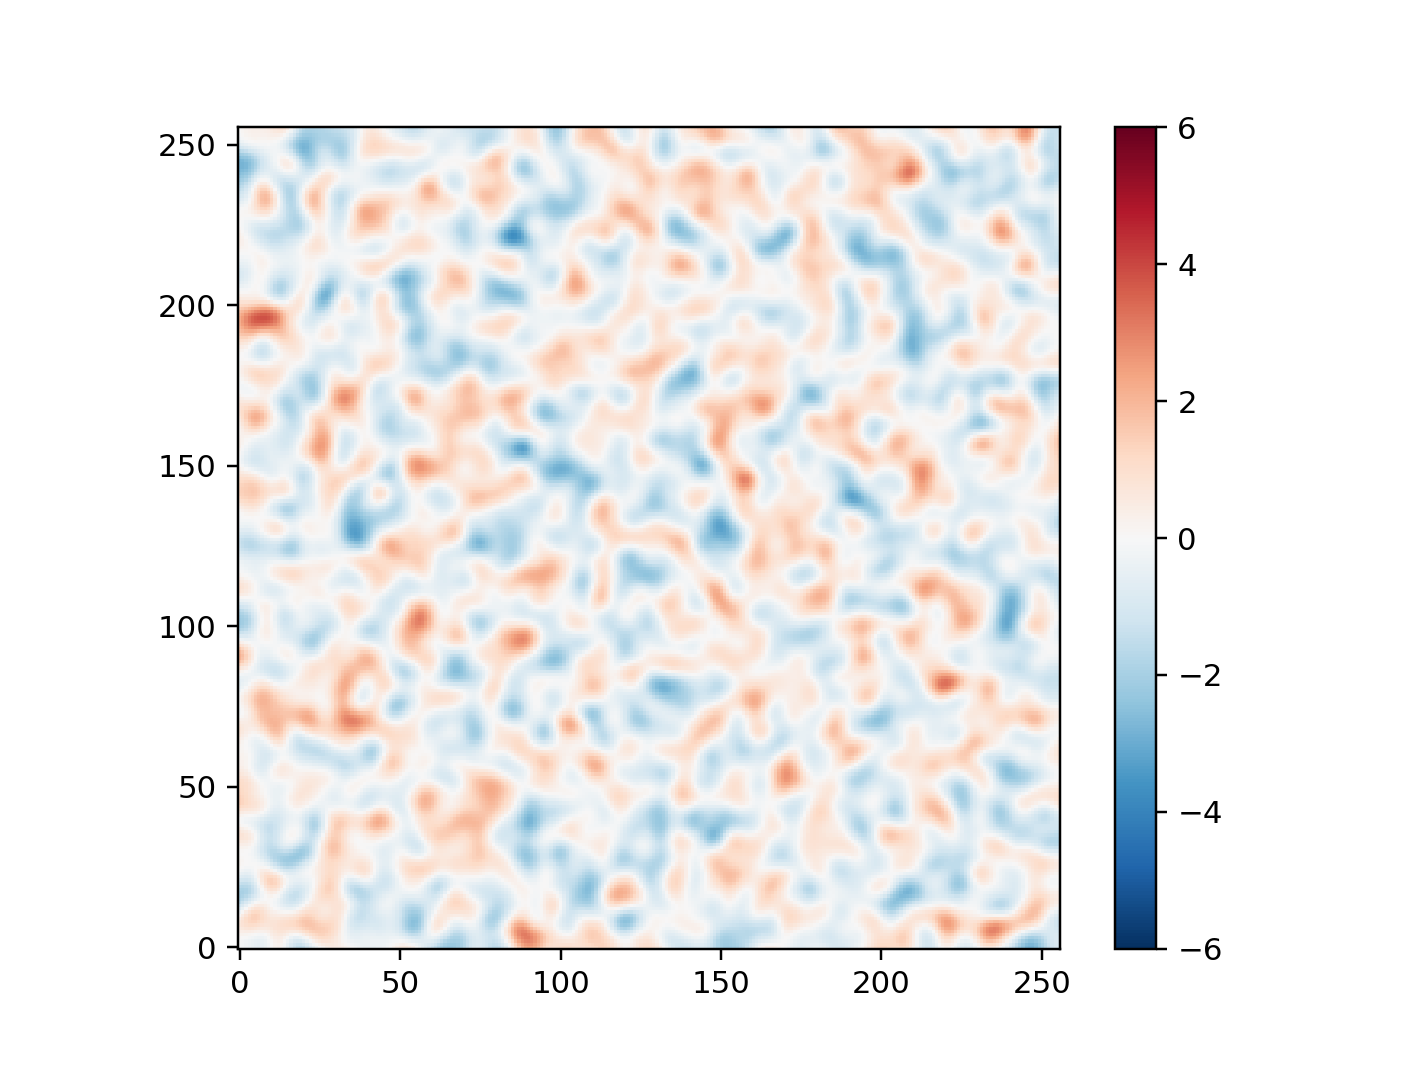

In [13]:
A = S.image.array / np.sqrt(S.variance.array)  # Scorr
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
cs = ax.imshow(A, interpolation='none', origin='bottom', cmap='RdBu_r', vmin=-6, vmax=6)
fig.colorbar(cs)

In [15]:
# Maximum detection significance in the noise only image of 256x256 pixels
print(np.amax(A))

3.828903139593256


In [16]:
S.variance.array[40:42,40:42]

array([[4.5628567e-05, 4.5628567e-05],
       [4.5628567e-05, 4.5628567e-05]], dtype=float32)

Visualization of the zogy difference and score image image PSF.

<IPython.core.display.Javascript object>


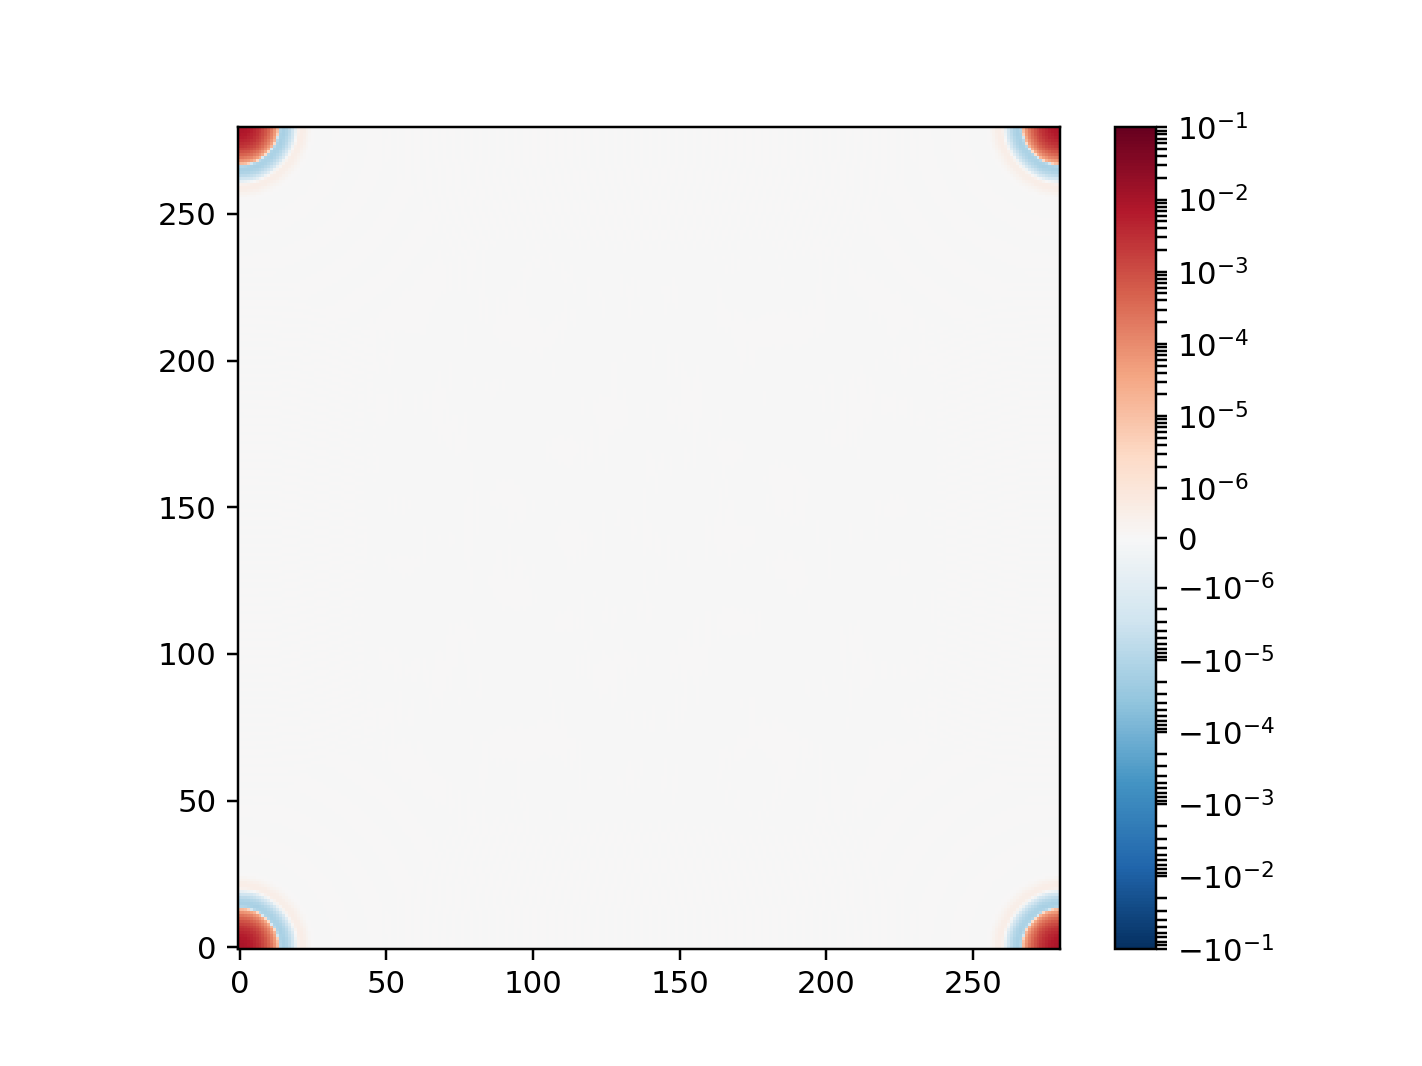

In [41]:
Pd = res.ftDiff.Ps
Pd = np.real(np.fft.ifft2(Pd))
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
cs = ax.imshow(Pd, interpolation='none', origin='bottom', cmap='RdBu_r',
               norm=matplotlib.colors.SymLogNorm(linthresh=1e-6,vmin=-0.1,vmax=0.1))
fig.colorbar(cs)

<IPython.core.display.Javascript object>


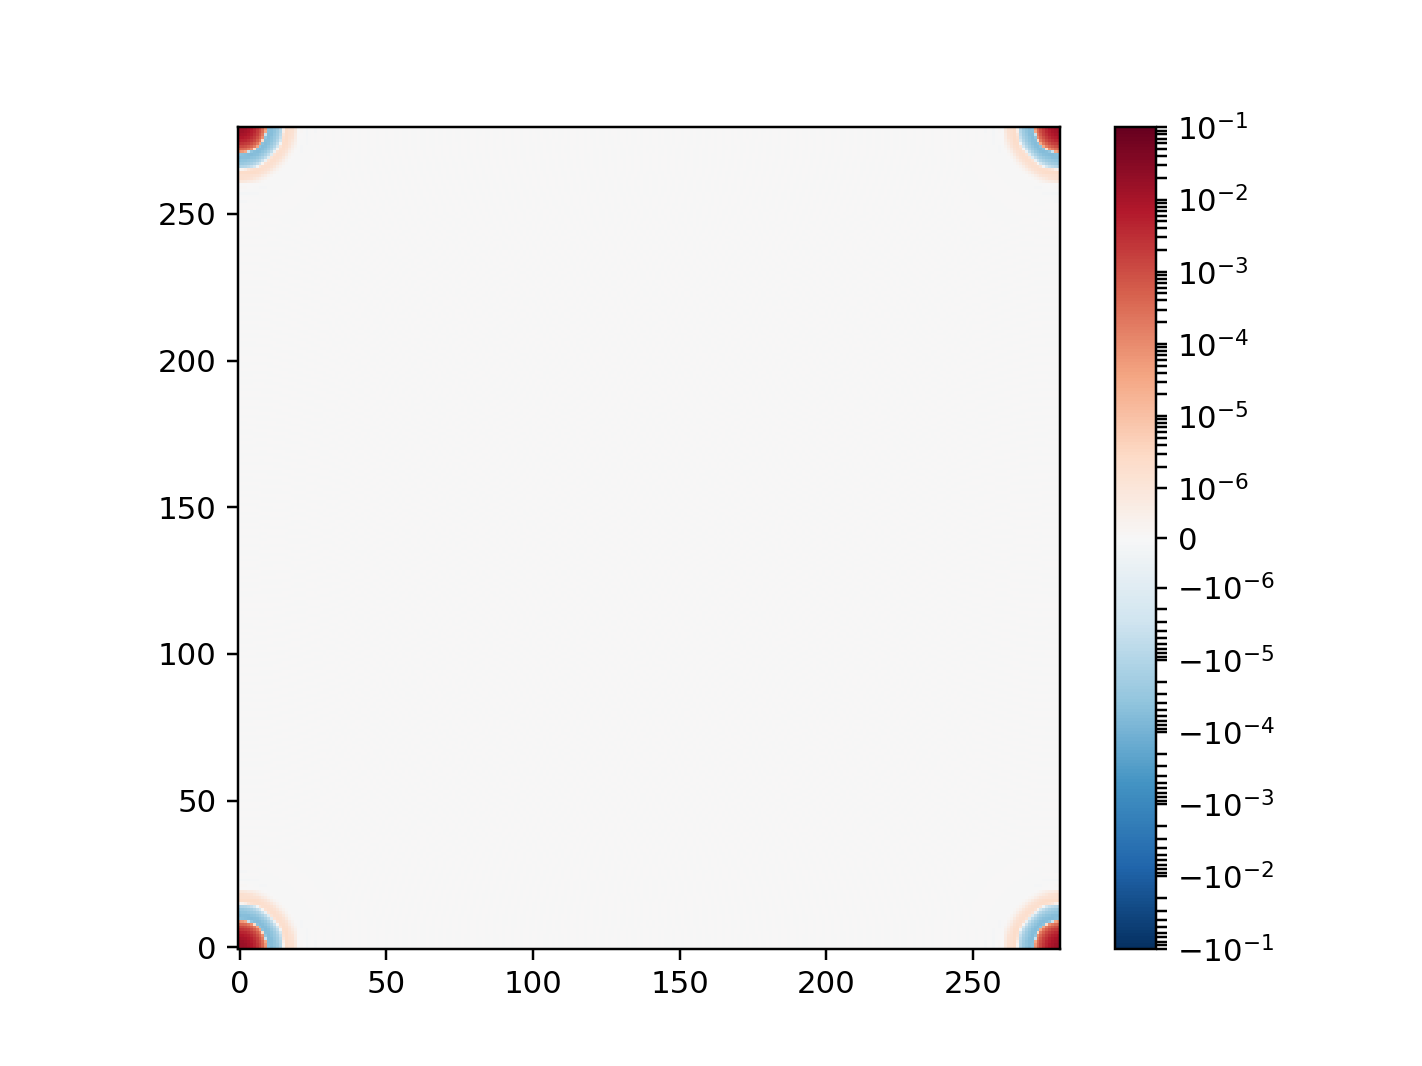

In [51]:
Pd = res.ftDiff.Pd
Pd = np.real(np.fft.ifft2(Pd))
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
cs = ax.imshow(Pd, interpolation='none', origin='bottom', cmap='RdBu_r',
               norm=matplotlib.colors.SymLogNorm(linthresh=1e-6,vmin=-0.1,vmax=0.1))
fig.colorbar(cs)

------

# Exposure w/ sources

In [71]:
T = ZogyTest()
T.setUp()
T._setUpImagesFlexible(svar=10., tvar=10., n_sources=10, varSourceChange=0.1)  # 5% flux change in one source

<IPython.core.display.Javascript object>


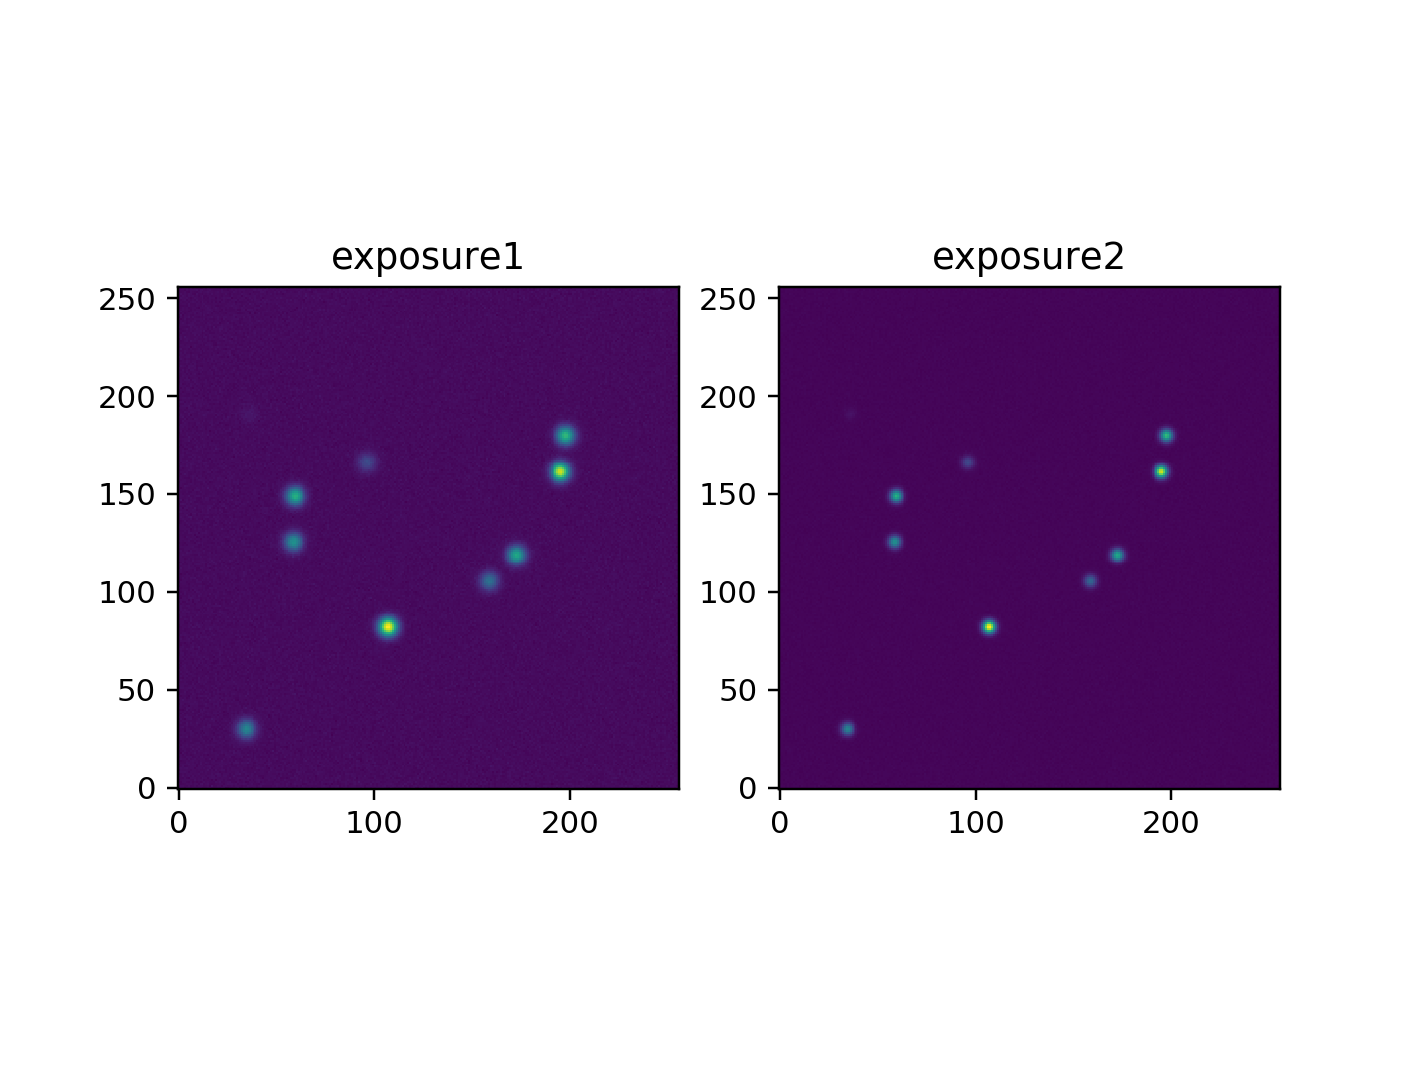

Text(0.5, 1.0, 'exposure2')

In [72]:
# Input exposures
R = T.im1ex
fig = plt.figure()
ax = fig.add_subplot(1, 2, 1)
ax.imshow(R.image.array, interpolation='none', origin='bottom')
ax.set_title("exposure1")

R = T.im2ex
ax = fig.add_subplot(1, 2, 2)
ax.imshow(R.image.array, interpolation='none', origin='bottom')
ax.set_title("exposure2")

In [73]:
config = ZogyConfig()
config.scaleByCalibration = False
task = ZogyTask(config=config)
res = task.run(T.im1ex, T.im2ex)
S = res.scoreExp
F = res.ftDiff
R = res.diffExp

(minimum=(0, 0), maximum=(24, 24))


<IPython.core.display.Javascript object>


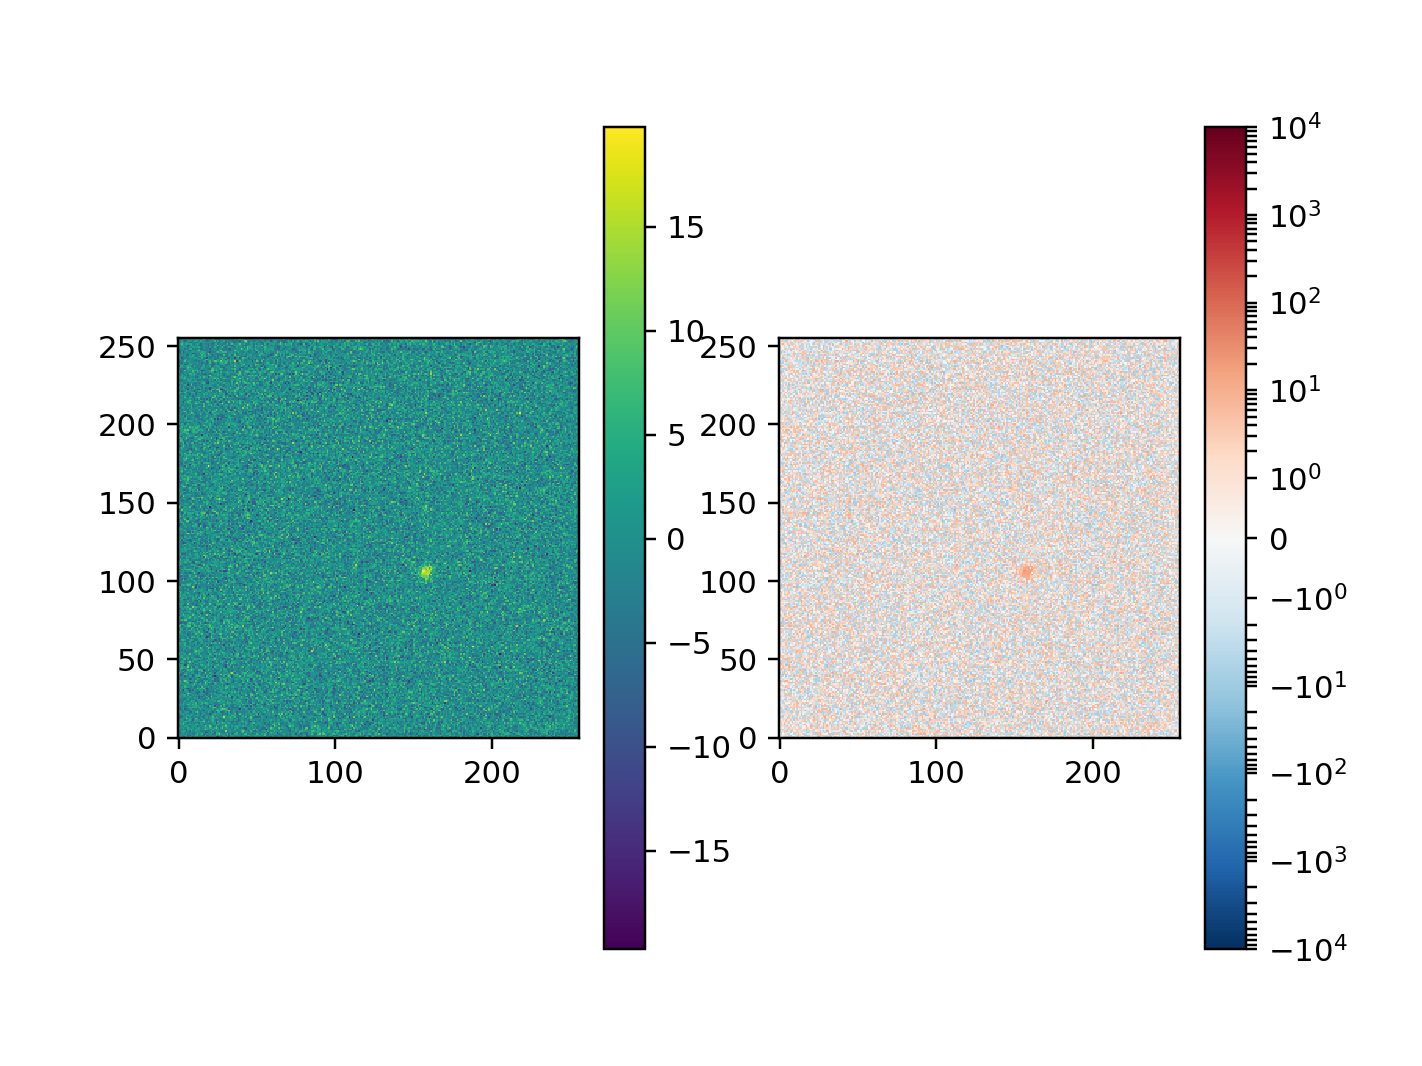

In [74]:
fig = plt.figure()
ax = fig.add_subplot(1, 2, 1)
cs = ax.imshow(R.image.array, interpolation='none', origin='bottom')
fig.colorbar(cs)
ax = fig.add_subplot(1, 2, 2)
cs = ax.imshow(R.image.array,origin='bottom',cmap='RdBu_r',
               norm=matplotlib.colors.SymLogNorm(linthresh=1,vmin=-10000,vmax=10000)
               )
fig.colorbar(cs)

<IPython.core.display.Javascript object>


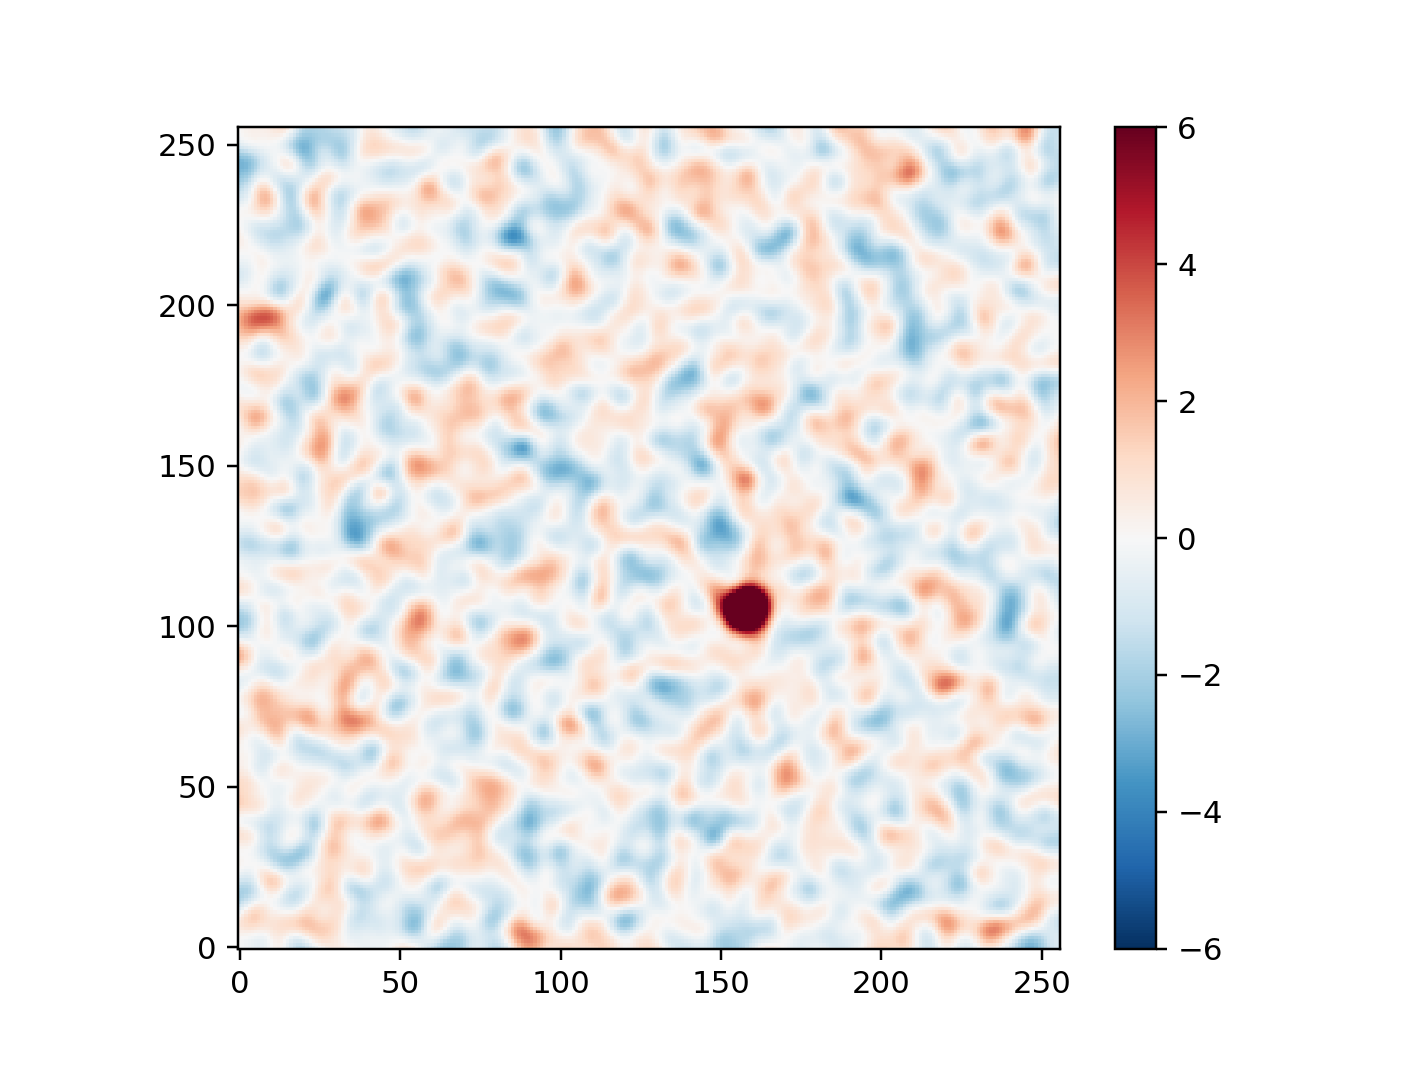

In [75]:
A = S.image.array / np.sqrt(S.variance.array)  # Scorr
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
cs = ax.imshow(A, interpolation='none', origin='bottom', cmap='RdBu_r', vmin=-6, vmax=6)
fig.colorbar(cs)

--------